In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
exames_df = pd.read_csv("exames.csv")
exames_df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


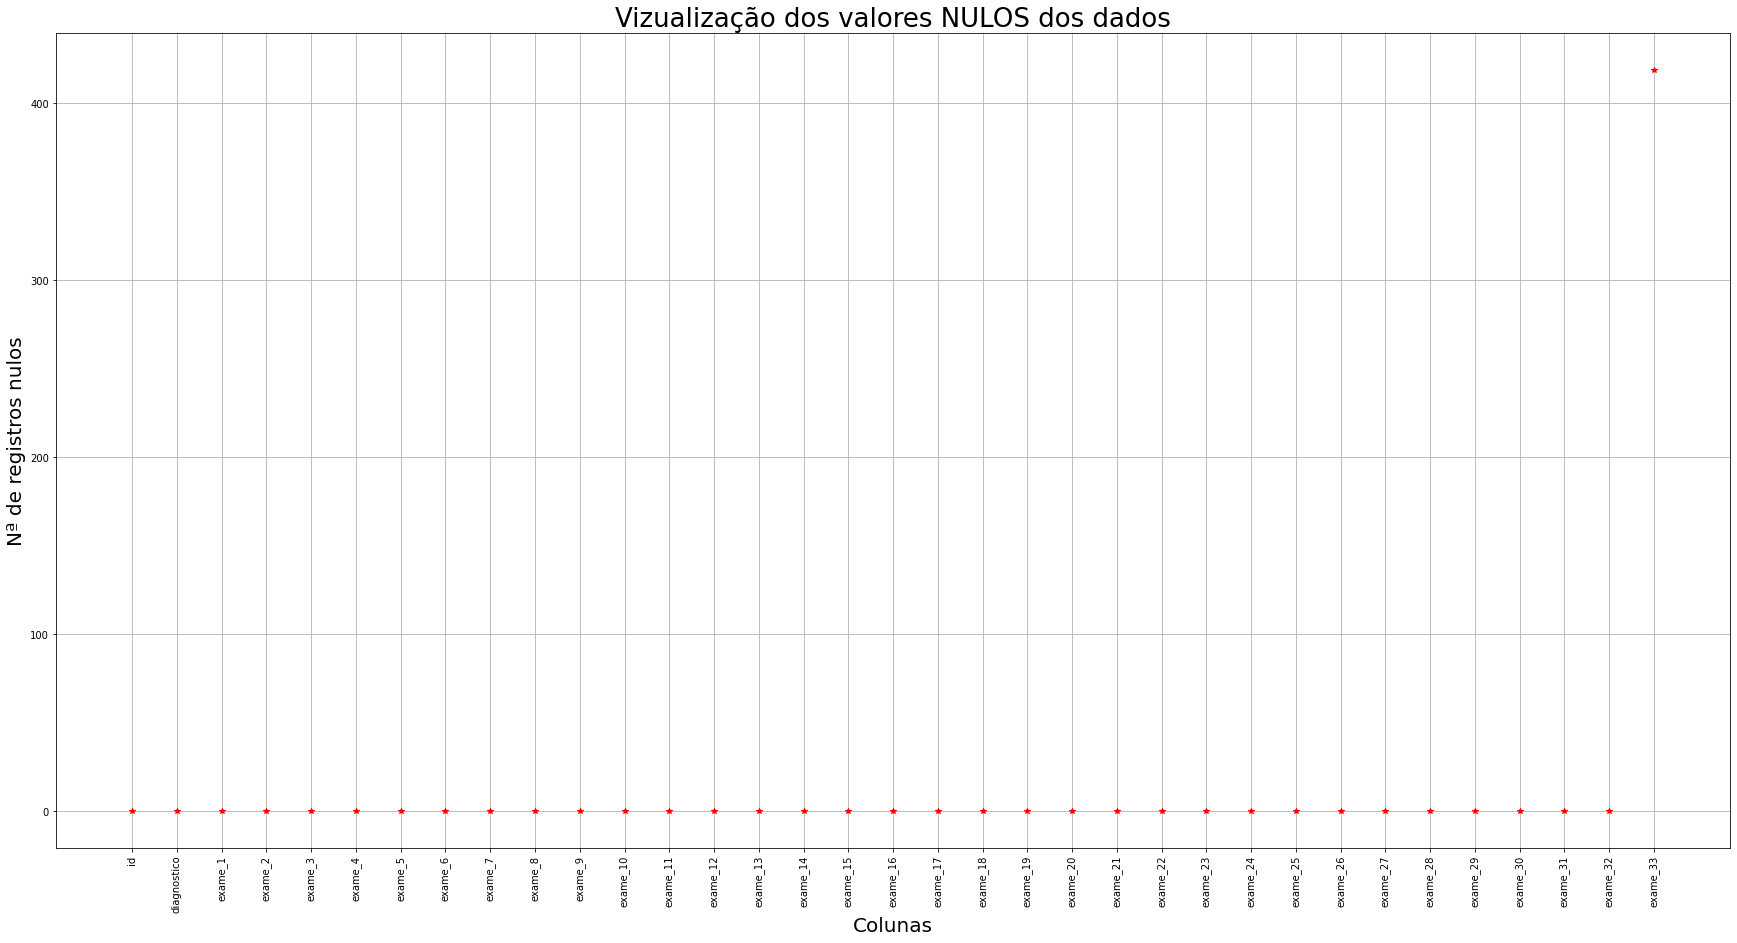

In [3]:
plt.figure(figsize=(30, 15))
plt.title("Vizualização dos valores NULOS dos dados", fontsize=26)
plt.ylabel("Nª de registros nulos", fontsize=20)
plt.xlabel("Colunas", fontsize=20)
plt.xticks(rotation = 90)
plt.plot(exames_df.isnull().sum(), "r*")
plt.grid(True)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

resultados_exames = exames_df.drop(columns=["exame_33"]) # removendo a coluna nula
valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, 
                                                        diagnostico,
                                                        test_size=0.3)

In [5]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
score = classificador.score(teste_x,teste_y)
print(f"Desempenho do Random Forest Classifier: {score* 100:.4f} %")

Desempenho do Random Forest Classifier: 92.3977 %


In [6]:
from sklearn.dummy import DummyClassifier

dummy_classificador = DummyClassifier(strategy="most_frequent")
dummy_classificador.fit(treino_x, treino_y)
score = dummy_classificador.score(teste_x,teste_y)
print(f"Desempenho do Dummy Classifier: {score* 100:.4f} %")

Desempenho do Dummy Classifier: 66.6667 %


In [7]:
dados_plot = pd.concat([diagnostico, valores_exames],axis = 1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [8]:
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


In [9]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_exames_std = padronizador.transform(valores_exames)
valores_exames_std = pd.DataFrame(data = valores_exames_std,
                                columns=valores_exames.keys())

valores_exames_std.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


In [10]:
from graficos import grafico_violino

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

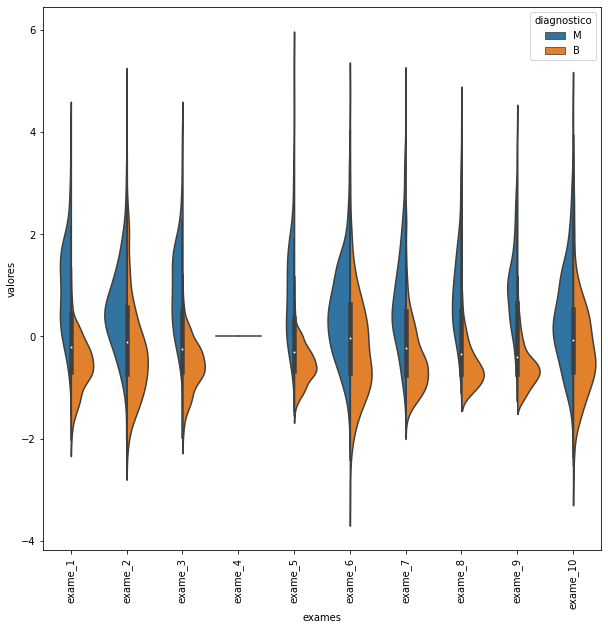

In [11]:
grafico_violino(valores_exames_std, diagnostico, 0, 10)

- Exame 4 possui valores constantes. Pode ser descartado para a nova análise.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'exame_11'),
  Text(1, 0, 'exame_12'),
  Text(2, 0, 'exame_13'),
  Text(3, 0, 'exame_14'),
  Text(4, 0, 'exame_15'),
  Text(5, 0, 'exame_16'),
  Text(6, 0, 'exame_17'),
  Text(7, 0, 'exame_18'),
  Text(8, 0, 'exame_19'),
  Text(9, 0, 'exame_20'),
  Text(10, 0, 'exame_21')])

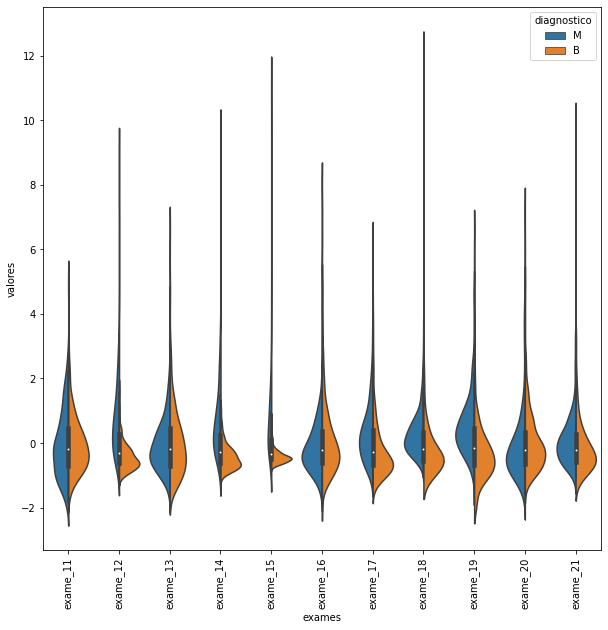

In [12]:
grafico_violino(valores_exames_std, diagnostico, 10, 21)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'exame_22'),
  Text(1, 0, 'exame_23'),
  Text(2, 0, 'exame_24'),
  Text(3, 0, 'exame_25'),
  Text(4, 0, 'exame_26'),
  Text(5, 0, 'exame_27'),
  Text(6, 0, 'exame_28'),
  Text(7, 0, 'exame_29'),
  Text(8, 0, 'exame_30'),
  Text(9, 0, 'exame_31'),
  Text(10, 0, 'exame_32')])

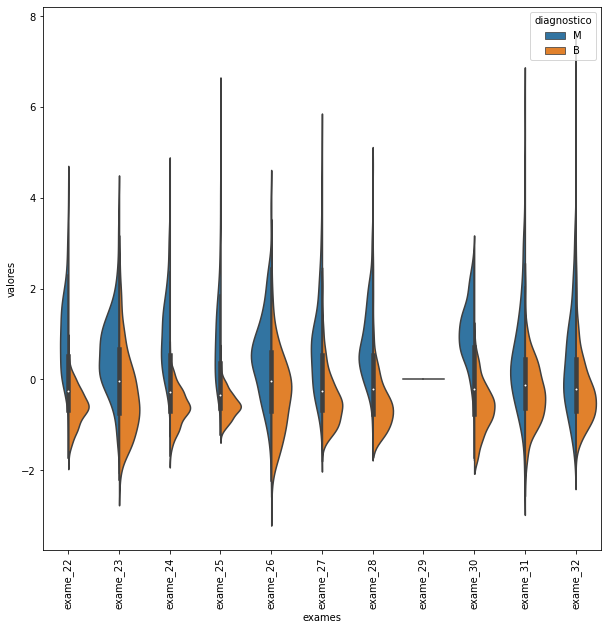

In [13]:
grafico_violino(valores_exames_std, diagnostico, 21, 32)

- Exame 29 possui valores constantes, pode ser descartado para a nova análise.

In [14]:
valores_exames_std_1 = valores_exames_std.drop(columns=["exame_29", "exame_4"])

In [19]:
from classificadores import random_forest_classifica, dummy_classifica

In [22]:
random_forest_classifica(valores_exames, diagnostico)

'Resultado da classificação RAND FOREST: 92.3977'

In [20]:
random_forest_classifica(valores_exames_std_1, diagnostico)

'Resultado da classificação RAND FOREST: 92.9825'

- Leve melhora mediante a remoção de duas colunas com valores constantes no classificador Random Forest.